In [1]:
%load_ext autoreload
%autoreload 2

In [52]:
from PIL import Image
from pigs import Pigs
import matplotlib.pyplot as plt
im_size = (80,80)

image = Image.open('pigs.jpg').convert('LA')
image = image.resize(im_size)

pig = Pigs(stop=1e-3, verbose=True, beta=1000)
# pass image or image path or np.array
# pig.segment(image)
    

# if __name__ == '__main__':
#     main()

In [53]:
%%time
# 01.
flat_image = pig.flatter(image)
# 02.
gram = pig.compute_gram(flat_image)


Image shape: (80, 80, 2)
CPU times: user 3.09 s, sys: 100 ms, total: 3.19 s
Wall time: 3.19 s


In [21]:
# n = 1000
# new_gram = np.zeros_like(gram)
# for i in range(gram.shape[0]):
#     new_gram[i,i:i+n] = gram[i,i:i+n]
# new_gram += new_gram.T
# gram = new_gram

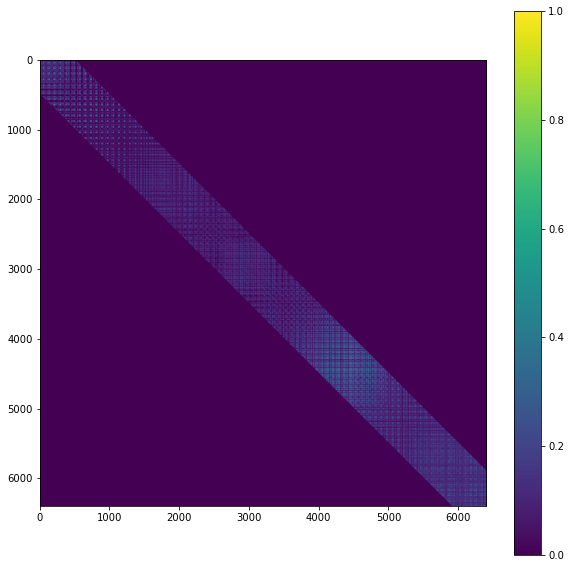

In [54]:
plt.figure(figsize=(10,10))
plt.imshow(gram)
plt.colorbar()

In [55]:
degree, laplace = pig.compute_LD(gram)


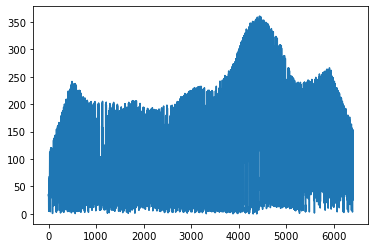

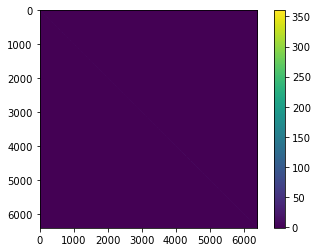

In [56]:
plt.figure()
plt.plot(degree)
plt.figure()
plt.imshow(laplace)
plt.colorbar()

In [46]:
# # 04.
x, root_node = pig.linear_solver(degree, laplace)
# # 05.

Root node: 4443


In [47]:
img_vector = flat_image

In [48]:
%%time
threshold, ir = pig.compute_IR_threshold(x, gram, degree)
print(threshold, ir )
mask = pig.generate_mask(img_vector, x, threshold, root_node)

2194.678126832864 0.020274674691402046
CPU times: user 24.9 s, sys: 22.9 ms, total: 24.9 s
Wall time: 24.8 s


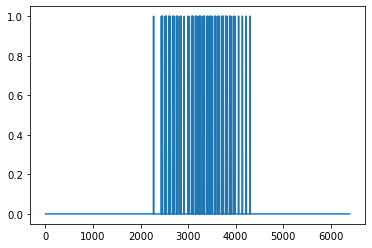

In [49]:
plt.plot(mask)

In [50]:
import numpy as np
mask.resize(im_size)
img = np.resize(flat_image, im_size)

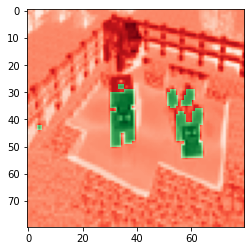

In [51]:
plt.imshow(img, 'Greens')
plt.imshow(np.ma.masked_where(mask, img), 'Reds')